In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [21]:
df.shape

(214, 10)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(213, 10)

In [24]:
X=df.iloc[:,:-1]
y=df['Type']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
80,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.00,0.00
162,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00
128,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17
96,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15


In [26]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

[0.627906976744186, 0.627906976744186, 0.5813953488372093, 0.6511627906976745, 0.6511627906976745, 0.6511627906976745, 0.6511627906976745, 0.6744186046511628, 0.6046511627906976, 0.5813953488372093, 0.5813953488372093, 0.5116279069767442, 0.5116279069767442, 0.46511627906976744, 0.46511627906976744]


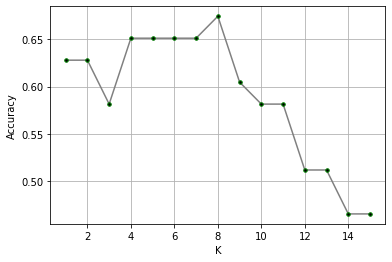

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score

scores=[]
for i in range(1,16):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train,y_train)
    y_pred=k.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
print(scores)
    
plt.plot(range(1,16),scores,c="grey",marker=".",ms=7,mfc="black",mec="green")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()